# Global Diet Composition Over Time: Analysis and Visualizations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go

from utils import europe, north_america, south_america, carribean_central_america, asia, africa, oceania, continents

pd.set_option('display.max_rows', None)

## Preprocessing

In [4]:
data = pd.read_csv("diet_composition.csv")
# each colum: kilocalories per person per day
# source: FAO 2017 

In [5]:
print(f"Number of countries: {data.Entity.nunique()}")
print(f"Year range: {data.Year.min()}-{data.Year.max()}")

Number of countries: 173
Year range: 1961-2013


In [6]:
data = data.rename(columns={
    "Entity":                                                              "country",
    "Year":                                                                "year",
    "Cereals and Grains (FAO (2017)) (kilocalories per person per day)":   "cereals_grains",
    "Pulses (FAO (2017)) (kilocalories per person per day)":               "pulses", 
    "Starchy Roots (FAO (2017)) (kilocalories per person per day)":        "starchy_roots", 
    "Sugar (FAO (2017)) (kilocalories per person per day)":                "sugar", 
    "Oils & Fats (FAO (2017)) (kilocalories per person per day)":          "oils_fats", 
    "Meat (FAO (2017)) (kilocalories per person per day)":                 "meat", 
    "Dairy & Eggs (FAO (2017)) (kilocalories per person per day)":         "dairy_eggs", 
    "Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)": "fruit_veg", 
    "Other (FAO (2017)) (kilocalories per person per day)":                "other", 
    "Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)":  "alcohol", 
})

In [7]:
conditions = [
    (data.country.isin(europe)),
    (data.country.isin(north_america)),
    (data.country.isin(south_america)),
    (data.country.isin(carribean_central_america)),
    (data.country.isin(asia)),
    (data.country.isin(africa)),
    (data.country.isin(oceania)),
]

data["continent"] = np.select(conditions, continents)

In [8]:
data.sample(5)

,country,year,cereals_grains,pulses,starchy_roots,sugar,oils_fats,meat,dairy_eggs,fruit_veg,other,alcohol,continent
7987,Vietnam,2006,1522,26,39,132,188,365,26,127,25,33.0,Asia
6797,South Korea,1997,1548,13,35,308,430,282,66,231,36,125.0,Asia
6369,Samoa,2005,522,0,304,269,834,584,65,219,67,30.0,Oceania
695,Belize,1993,946,101,72,413,358,220,194,264,49,73.0,Caribbean and Central America
2171,Dominican Republic,1994,724,81,51,389,423,156,121,204,18,85.0,Caribbean and Central America


In [9]:
data.describe() 

,year,cereals_grains,pulses,starchy_roots,sugar,oils_fats,meat,dairy_eggs,fruit_veg,other,alcohol
count,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8101.000000
mean,1988.014962,1064.064753,56.069046,179.074197,272.900049,357.627545,220.173412,170.550527,149.544395,28.833211,73.295889
std,15.384679,356.279239,51.150346,211.449560,152.690877,189.965492,157.937054,138.159514,97.050870,25.593864,71.148025
min,1961.000000,127.000000,0.000000,0.000000,0.000000,13.000000,16.000000,0.000000,4.000000,-1.000000,0.000000
25%,1975.000000,800.000000,19.000000,50.000000,139.000000,217.000000,89.000000,49.000000,81.000000,12.000000,17.000000
50%,1989.000000,1039.000000,43.000000,109.000000,285.000000,329.000000,174.000000,140.000000,132.000000,21.000000,52.000000
75%,2001.000000,1304.000000,76.000000,204.000000,389.000000,468.000000,328.000000,266.000000,196.000000,36.000000,113.000000
max,2013.000000,2530.000000,471.000000,1421.000000,707.000000,1053.000000,793.000000,696.000000,772.000000,190.000000,474.000000


In [10]:
col_name = "other"
for idx, row in data.iterrows():
    if row[col_name] < 0:
        print(row[col_name], row["country"])

-1 Benin
-1 North Korea


In [11]:
data["other"] = data["other"].replace(to_replace=-1, value=0)

In [12]:
diet_columns = [
    "cereals_grains",
    "pulses", 
    "starchy_roots",
    "sugar", 
    "oils_fats",
    "meat", 
    "dairy_eggs", 
    "fruit_veg",
    "other", 
    "alcohol"
]

## Daily calorie consumption per person in Europe (1961-2013)

In [13]:
data["total"] = data[diet_columns].sum(axis=1)

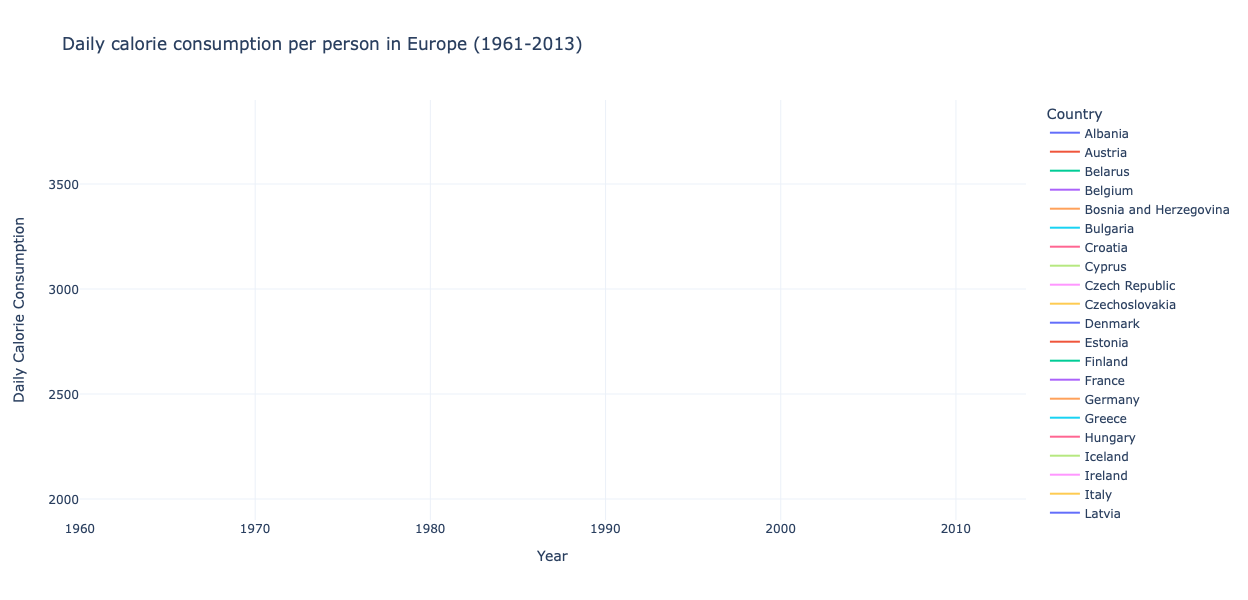

In [31]:
calory_consumption_europe = data.query('continent == "Europe"')
fig = px.line(calory_consumption_europe, 
              x="year", 
              y="total", 
              color="country",
              title="Daily calorie consumption per person in Europe (1961-2013)",
              labels={"country": "Country", "total": "Daily Calorie Consumption", "year": "Year"},
              height=600,
              width=1200,
              template="plotly_white",
              
             )

fig.update_xaxes(range=[1960, 2014])
fig.update_yaxes(range=[1900, 3900])

fig.show()

### Noteworthy
- Virtually all European countries saw an increase in daily calory consumption between 1961 and 2013.
- The three countries with the most daily calory intake per person in 2013 are Austria (3768), Belgium (3733) and Turkey (3706), while the three countries with the lowest one are Serbia (2728, Moldova (2714) and Cyprus (2649) - that's a difference of about 1000 kcal per person and day! 
- Out of the three countries with the lowest calory intake in 1961, Portugal and Albania rose and now lie in the middle while Cyprus remains on of the European country with the lowest calory consumption.

## Diet 1961 vs. 2013 in Europe

In [18]:
europe_1961_2013 = data[(data.continent == "Europe") & (data.year.isin([1961, 2013]))].reset_index()
keep_countries = [country for country in list(europe_1961_2013["country"].unique()) if europe_1961_2013[europe_1961_2013["country"] == country]["country"].value_counts().item() == 2]
select_europe_1961_2013 = europe_1961_2013.query('country in @keep_countries')

plot_data = {"total": [], "country": [], "years": [], "colors": []}

for country in keep_countries:
    plot_data["total"].extend(
    [
        select_europe_1961_2013.loc[(select_europe_1961_2013.year == 1961) & (select_europe_1961_2013.country == country)]["total"].values[0],
        select_europe_1961_2013.loc[(select_europe_1961_2013.year == 2013) & (select_europe_1961_2013.country == country)]["total"].values[0],
        None
    ])
    plot_data["country"].extend([country, country, None])
    plot_data["colors"].extend(["green", "blue", "brown"])
    plot_data["years"].extend(["1961", "2013", None])

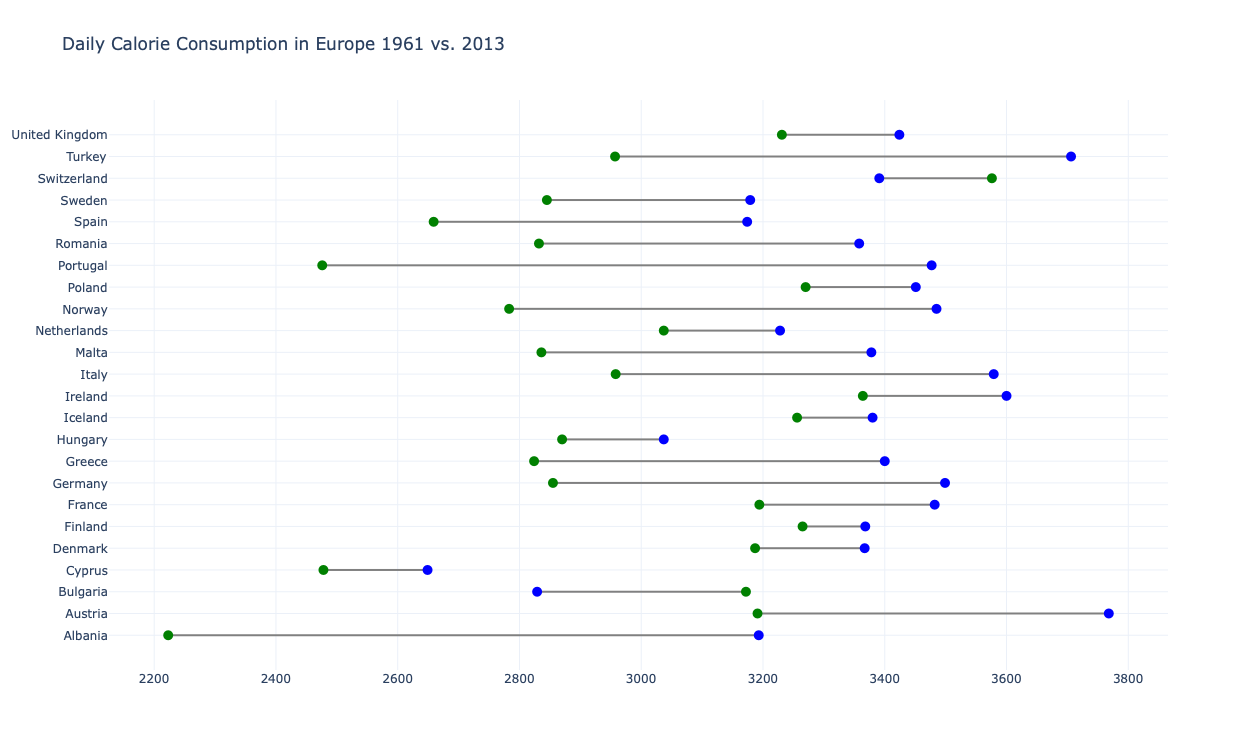

In [33]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=plot_data["total"],
            y=plot_data["country"],
            mode="lines",
            marker=dict(
                color="grey",
            ),
        ),
        go.Scatter(
            x=plot_data["total"],
            y=plot_data["country"],
            mode="markers+text",
            marker=dict(
                color=plot_data["colors"],
                size=10,
            ),
            hovertemplate="""Country: %{y} <br> Daily Calorie Consumption: %{x} <br><extra></extra>""",
        ),
    ]
)

fig.update_layout(
    title="Daily Calorie Consumption in Europe 1961 vs. 2013",
    height=750,
    width=750,
    showlegend=False,
    template="plotly_white"
)

fig.show()

### Noteworthy
The points made below the previous plot are further underlined in this plot:
- Albania and Portugal actually saw the highest increase in daily calorie intake between 1961 and 2013, followed by Turkey.
- The two countries that in 2013 have a lower daily calory intake per person than in 1961 are Switzerland (from 3576 to 3391), Bulgaria (from 3172 to 2829)

## Median daily calorie consumption per person per continent (1961-2013)

In [15]:
median_calorie_consumption_per_continent = data.groupby(["continent", "year"])["total"].apply(np.median)
median_calorie_consumption_per_continent = pd.DataFrame(median_calorie_consumption_per_continent).reset_index()

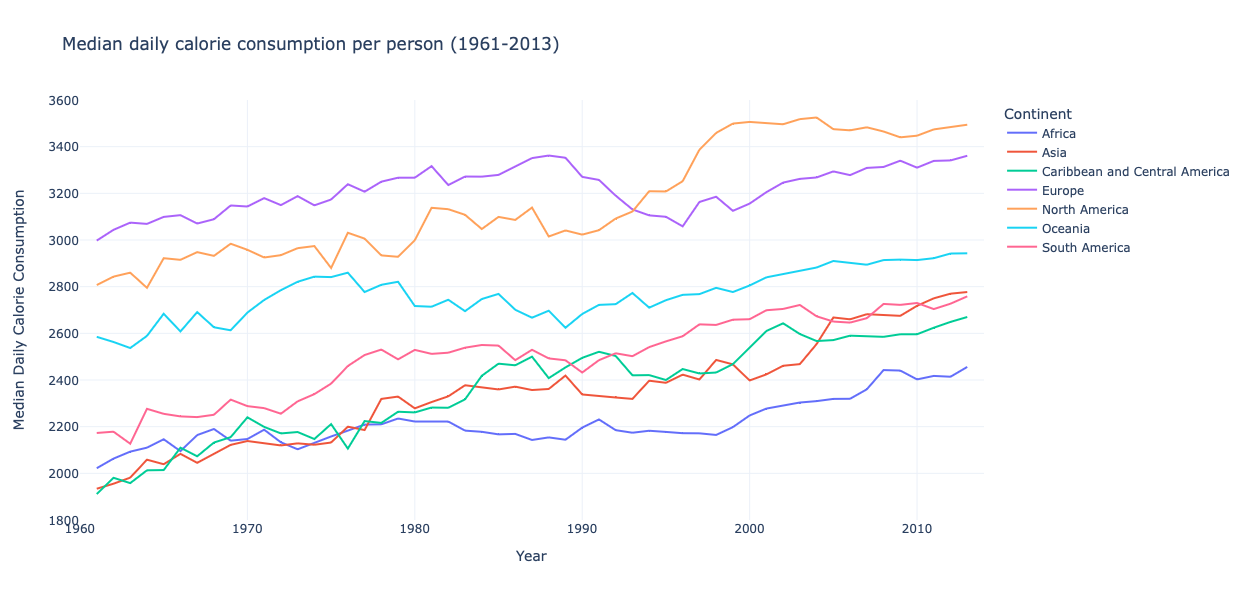

In [29]:
fig = px.line(median_calorie_consumption_per_continent, 
              x="year", 
              y="total", 
              title="Median daily calorie consumption per person (1961-2013)",
              height=600,
              width=1200,
              color="continent",
              template="plotly_white",
              labels={"continent": "Continent", "total": "Daily Calorie Consumption (Median)", "year": "Year"},
             )

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Median Daily Calorie Consumption",
    legend={"title": {"text": "Continent"}},
)

fig.update_xaxes(range=[1960, 2014])
fig.update_yaxes(range=[1800, 3600])

fig.show()

### Noteworthy
- All continents saw an increase in median daily calory intake between 1961 and 2013.
- North America overtook Europe in 1993 and is now the top continent regarding daily calory intake (3494 kcal)
- While in 1961 there was a clear divide between Europe/North America/Oceania and Asia/Africa/Caribbean and Central America/SouthAmerica, in 2013 continents can be grouped into Europe/North America, Oceania/Asia/South America/Caribbean and Central America, and Africa

## Ratio plants : animal 

In [21]:
plants = ["cereals_grains", "pulses", "starchy_roots", "sugar", "fruit_veg"]
animals = ["meat", "dairy_eggs"]
plants_animals_combined = plants + animals

# leave out oils_fat (include both), other, and alcohol

In [22]:
data["animal_based"] = data[animals].sum(axis=1)
data["plant_based"] = data[plants].sum(axis=1)
data["animal_and_plant_based"] = data[plants_animals_combined].sum(axis=1)

In [23]:
plant_ratio = data.assign(plant_ratio = lambda row: (row["plant_based"] / row["animal_and_plant_based"] * 100))
animal_ratio = data.assign(animal_ratio = lambda row: (row["animal_based"] / row["animal_and_plant_based"] * 100))

In [24]:
data["plant_ratio"] = plant_ratio["plant_ratio"]
data["animal_ratio"] = animal_ratio["animal_ratio"]

In [25]:
median_animal_ratio_per_continent = data.groupby(["continent", "year"])["animal_ratio"].apply(np.median)
median_animal_ratio_per_continent = pd.DataFrame(median_animal_ratio_per_continent).reset_index()

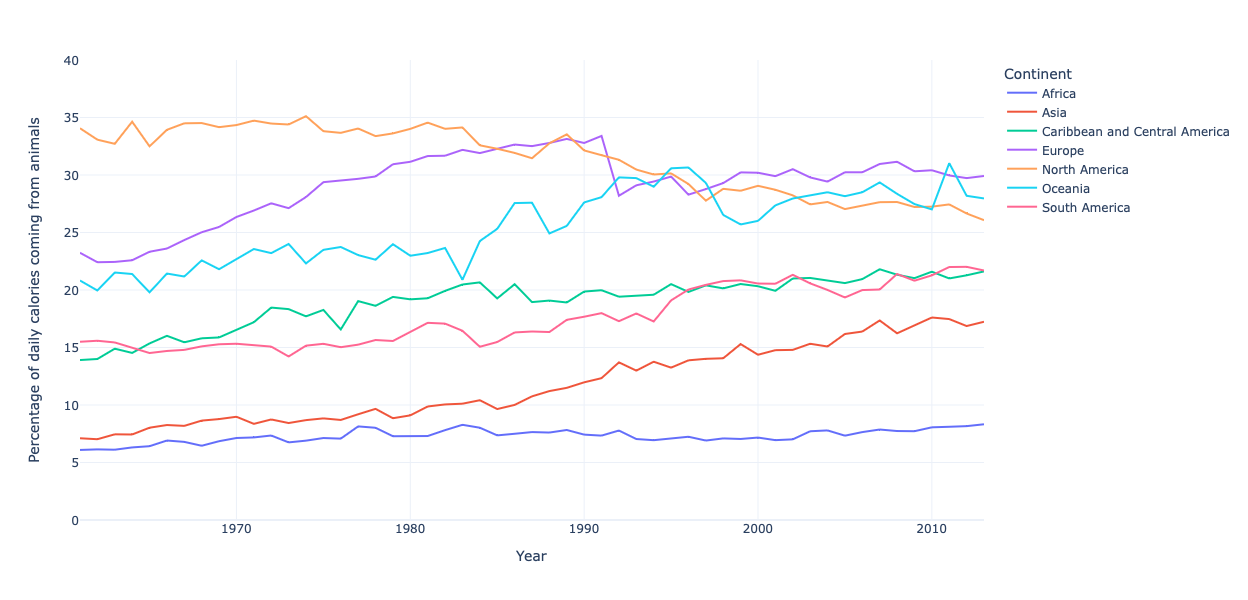

In [30]:
fig = px.line(median_animal_ratio_per_continent, 
              x="year", 
              y="animal_ratio", 
              title="",
              height=600,
              width=1200,
              color="continent",
              template="plotly_white",
              labels={"continent": "Continent", "animal_ratio": "% Daily Calories of Animal Origin", "year": "Year"},
             )

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Percentage of daily calories coming from animals",
    legend={"title": {"text": "Continent"}},
)
# fig.update_xaxes(range=[0.0, 100.0])
fig.update_yaxes(range=[0.0, 40.0])
fig.show()

### Noteworthy
- North America is the only continent where the percentage of calories coming from animal has actualyl decreased over the years (from 34% to 26%)
- The sharp decline in Europe in 1992 is arguably due to incorrect or inconsistent measurement which can be attributed to the breakup of Yugoslavia and USSR.
- Europe saw a rise in percentage of calories coming from animals until 1992, and from then on the number roughly stagnated
- While Africa's percentage of calories coming from animals stayed virtually the same, Asia - starting out from a very similar plcae in 1961 - has increased its percentage from 7 to 17.
